In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path='data/'

users = pd.read_csv(path+'users.csv')
books = pd.read_csv(path+'books.csv')
ratings = pd.read_csv(path+'train_ratings.csv')


print('users shape: ', users.shape)
print('books shape: ', books.shape)
print('ratings shape: ', ratings.shape)

users shape:  (68092, 3)
books shape:  (149570, 10)
ratings shape:  (306795, 3)


In [4]:
users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '', regex=True) # 특수문자 제거

users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users = users.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
users = users.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.

In [5]:
modify_location = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values
location = users[(users['location'].str.contains('seattle'))&(users['location_country'].notnull())]['location'].value_counts().index[0]

location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

In [6]:
for location in location_list:
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1]
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2]

KeyboardInterrupt: 

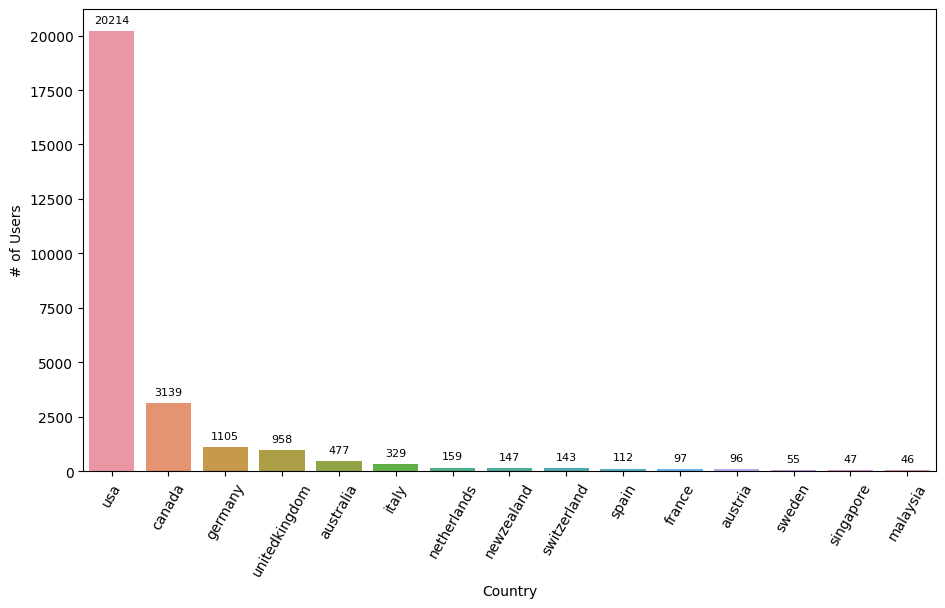

In [13]:
my_dict=(users[users['age'].isna()]['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

In [14]:
users = users.drop(columns='location')

In [15]:
books[books['language'].isna() & books['summary'].notnull()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [16]:
books[books['language'].notnull() & books['summary'].isna()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [17]:
books[books['language'].isna() & books['category'].notnull()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [18]:
books[books['language'].notnull() & books['category'].isna()] 

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
138,2070567842,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,1994.0,Gallimard-Jeunesse,http://images.amazon.com/images/P/2070567842.0...,fr,NaN,Un petit garçon se pose énormément de question...,images/2070567842.01.THUMBZZZ.jpg
193,3596292646,Das Buch der lÃ?Â¤cherlichen Liebe.,Milan Kundera,2000.0,"Fischer (Tb.), Frankfurt",http://images.amazon.com/images/P/3596292646.0...,de,NaN,Die im &#39;Buch der lächerlichen Liebe&#39; v...,images/3596292646.01.THUMBZZZ.jpg
486,0871131811,Zodiac: The Eco-Thriller,Neal Stephenson,1988.0,Pub Group West,http://images.amazon.com/images/P/0871131811.0...,en,NaN,"Sangamon Taylor, an environmental extremist, s...",images/0871131811.01.THUMBZZZ.jpg
880,067144378X,SABLE MOON,Nancy Springer,1981.0,Pocket,http://images.amazon.com/images/P/067144378X.0...,en,NaN,Seventeen-year-old Prince Trevyn must save the...,images/067144378X.01.THUMBZZZ.jpg
1001,0345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339711.0...,en,NaN,"Thus continues the magnificent, bestselling ta...",images/0345339711.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
149252,3770401697,"Lucky Luke, Bd.58, Die Geister-Ranch und ander...",Michel Janvier,1989.0,"Egmont Ehapa, Berlin",http://images.amazon.com/images/P/3770401697.0...,de,NaN,"Enth. noch: Die Hellseherin, Die Statue und Di...",images/3770401697.01.THUMBZZZ.jpg
149307,0806917695,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997.0,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,en,NaN,"Normal situations veer off into the bizarre, c...",images/0806917695.01.THUMBZZZ.jpg
149329,3426192543,Im FrÃ?Â¼hling singt zum letztenmal die Lerche.,Johannes Mario Simmel,1990.0,Droemer Knaur,http://images.amazon.com/images/P/3426192543.0...,de,NaN,Eine Gruppe von Idealisten nimmt den Kampf geg...,images/3426192543.01.THUMBZZZ.jpg
149441,2253054615,Le maharani,Gita Mehta,1990.0,LGF,http://images.amazon.com/images/P/2253054615.0...,fr,NaN,Elevée à la cour comme toutes les maharani l&#...,images/2253054615.01.THUMBZZZ.jpg


In [19]:
books[books['isbn'] != books['img_url'].apply(lambda x: x.split('P/')[1][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [20]:
## 살짝 다름

In [21]:
books[books['isbn']!=books['img_path'].apply(lambda x: x.split('/')[1][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [22]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

publisher_count_df = publisher_count_df.sort_values(by=['count'], ascending = False)

In [23]:
publisher_count_df.head()

,publisher,count
0,Harlequin,3005
1,Ballantine Books,2322
2,Pocket,2274
3,Penguin Books,1943
4,Bantam Books,1938


In [24]:
books['publisher'].nunique()

11571

In [25]:
books[books['isbn'].apply(lambda x: x[:4])=='0140']['publisher'].unique()

array(['Penguin Books', 'Penguin Books Ltd', 'Puffin Books',
       'Penguin USA (Paper)', 'Penguin USA', 'Puffin',
       'Penguin Putnam~trade', 'Penguin Putnam~mass',
       'Penguin/Puffin Mass Market (Mm)', 'Viking Books',
       'Penguin Books Australia Ltd', 'Penguin Uk',
       'Scott Foresman (Pearson K-12)',
       'Penguin Putnam Books for Young Readers',
       'French & European Pubns', 'Viking Penguin', 'Arkana',
       'Penguin Highbridge Audio', 'Penguin (Non-Classics)',
       'Penguin Books, Limited (UK)', 'Viking Press', 'Penguin U S A',
       'Penguin/Puffin Mass Market', 'Select Penguin (Mm)',
       'Penguin Putnam', 'Penguin Books India', 'Select Penguin',
       'Penguin Books Australia Ltd.', 'Viking Penguin Inc',
       'Penguin Audiobooks', 'Studio Books', 'Penguin',
       'Hyperion Books for Children', 'Putnam Pub Group', 'Penguin India',
       'Compass Books', 'Penguin Putnam~childrens Hc',
       'Penguin in association with Secker and Warburg', 'Time O

In [26]:
modify_list = publisher_count_df[publisher_count_df['count']>1].publisher.values

In [27]:
publisher_count_df[publisher_count_df['count']>1].publisher.values

array(['Harlequin', 'Ballantine Books', 'Pocket', ..., 'Guild Publishing',
       'Andre Deutsch', 'Peppermind'], dtype=object)

In [28]:
for publisher in modify_list:
    try:
        number = books[books['publisher']==publisher]['isbn'].apply(lambda x: x[:4]).value_counts().index[0]
        right_publisher = books[books['isbn'].apply(lambda x: x[:4])==number]['publisher'].value_counts().index[0]
        books.loc[books[books['isbn'].apply(lambda x: x[:4])==number].index,'publisher'] = right_publisher
    except: 
        pass

In [29]:
books['publisher'].nunique() #수정 후 출판사 갯수입니다

1523

In [30]:
import re
books.loc[books[books['category'].notnull()].index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

In [31]:
books['category'] = books['category'].str.lower()

In [32]:
category_df = pd.DataFrame(books['category'].value_counts()).reset_index()
category_df.columns = ['category','count']
category_df.head()

,category,count
0,fiction,33016
1,juvenile fiction,5835
2,biography autobiography,3326
3,history,1927
4,religion,1818


In [33]:
category_df[category_df['count']>=10]

,category,count
0,fiction,33016
1,juvenile fiction,5835
2,biography autobiography,3326
3,history,1927
4,religion,1818
...,...,...
253,children s poetry english,10
254,abused children,10
255,courage,10
256,diary fiction,10


In [34]:
books['category_high'] = books['category'].copy()
books.loc[books[books['category']=='biography'].index, 'category_high'] = 'biography autobiography'
books.loc[books[books['category']=='autobiography'].index,'category_high'] = 'biography autobiography'

In [35]:
books[books['category'].str.contains('history', na=False)]['category'].unique()

array(['history', 'oral history', 'natural history', 'history modern',
       'world history', 'politics history 1945', 'history asia',
       'church history', 'constitutional history'], dtype=object)

In [36]:
books.loc[books[books['category'].str.contains('history',na=False)].index,'category_high'] = 'history'

In [37]:
categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

In [38]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
category_high_df.head(10)

,category,count
0,fiction,39678
1,biography autobiography,3335
2,history,1949
3,religion,1824
4,nonfiction,1427
5,humor,1291
6,social,1271
7,business,1146
8,cook,1125
9,body mind spirit,1113


In [39]:
# 5개 이하인 항목은 others로 묶어주도록 하겠습니다.
others_list = category_high_df[category_high_df['count']<5]['category'].values

In [40]:
books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'

In [41]:
books['category'].nunique()

4105

In [42]:
books['category_high'].nunique()

412

In [43]:
books.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
category_high          68851
dtype: int64

In [44]:
books[books['book_title'].str.contains("Pleading Guilty")]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
5041,0446365505,Pleading Guilty,Scott Turow,1994.0,Warner Books,http://images.amazon.com/images/P/0446365505.0...,NaN,NaN,NaN,images/0446365505.01.THUMBZZZ.jpg,NaN
22680,0816157464,Pleading Guilty (G K Hall Large Print Book Ser...,Scott Turow,1993.0,Troll Communications,http://images.amazon.com/images/P/0816157464.0...,NaN,NaN,NaN,images/0816157464.01.THUMBZZZ.jpg,NaN
37056,0374234574,Pleading Guilty,Scott Turow,1993.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374234574.0...,en,fiction,Immediately. Turow&#39;s third novel takes us ...,images/0374234574.01.THUMBZZZ.jpg,fiction


In [45]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

In [46]:
books[books['book_title'].str.contains('Harry')]['book_title']

390        Harry Potter and the Chamber of Secrets (Book 2)
391        Harry Potter and the Chamber of Secrets (Book 2)
392       Harry Potter and the Prisoner of Azkaban (Book 3)
393       Harry Potter and the Prisoner of Azkaban (Book 3)
394            Harry Potter and the Goblet of Fire (Book 4)
                                ...                        
140403    Eleanor and Harry : The Correspondence of Elea...
142947    The Hidden Key to Harry Potter: Understanding ...
143065    Harry and Ike: The Partnership That Remade the...
145141    Harry Potter und der Gefangene von Askaban. So...
147880                        Horseshoe Harry and the Whale
Name: book_title, Length: 180, dtype: object

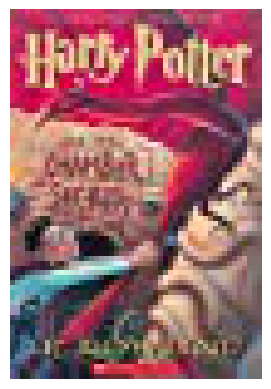

In [47]:
fig= plt.plot(figsize=(3,4))
url = books['img_url'][391]
img = np.asarray(Image.open(requests.get(url, stream=True, headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}).raw))
plt.axis("off")
plt.imshow(img)

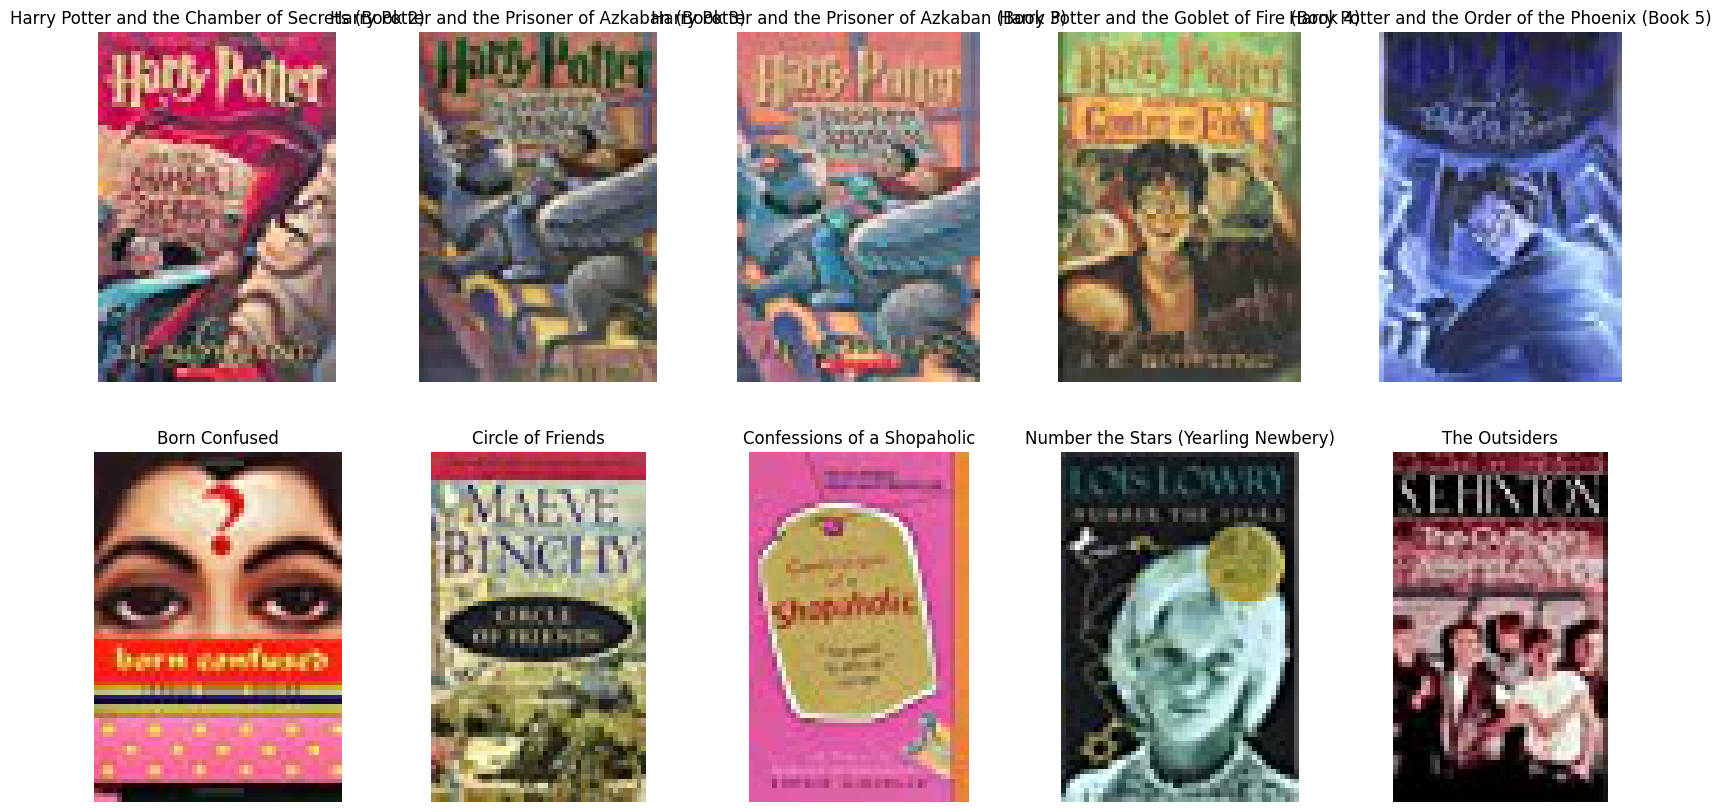

In [48]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10)) 
for i, ax in zip(range(391, 401), ax.flatten()):
    url = books['img_url'][i]
    img = np.asarray(Image.open(requests.get(url, stream=True, headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}).raw))
    ax.imshow(img)
    ax.axis("off")
 
    ax.set_title(books['book_title'][i])

fig.show()

In [49]:
import zipfile
import os

In [50]:
books['publisher'].value_counts().head(10)

publisher
Pocket                7306
Harlequin             5268
Bantam Books          4815
St. Martin's Press    4043
Vintage Books USA     3822
Penguin Books         3807
Perennial             3313
Ballantine Books      3090
Signet Book           3068
Avon                  2792
Name: count, dtype: int64

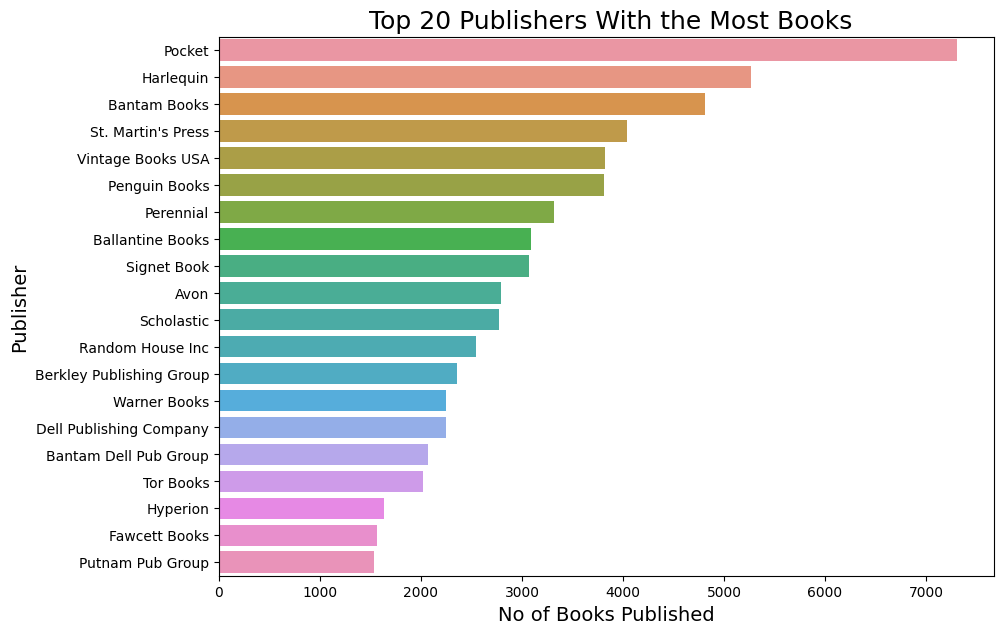

In [51]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

b = publisher_count_df.sort_values(by=['count'], ascending = False)
b = b.head(20)

fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'publisher' , data = b)

plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)

plt.show()

In [52]:
print(sorted(books['year_of_publication'].unique()),end=' ') 

[1376.0, 1378.0, 1806.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1911.0, 1920.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0] 

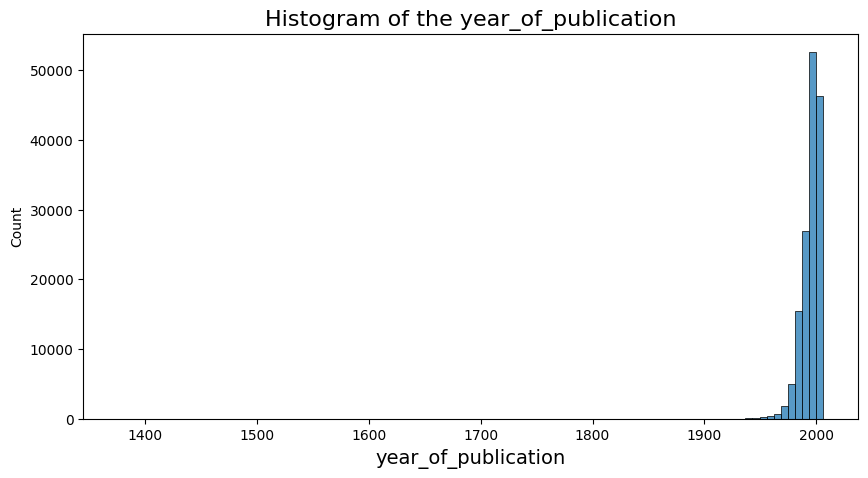

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(books['year_of_publication'],bins=100)
plt.xlabel('year_of_publication',size=14)
plt.title('Histogram of the year_of_publication',size=16)
plt.show()

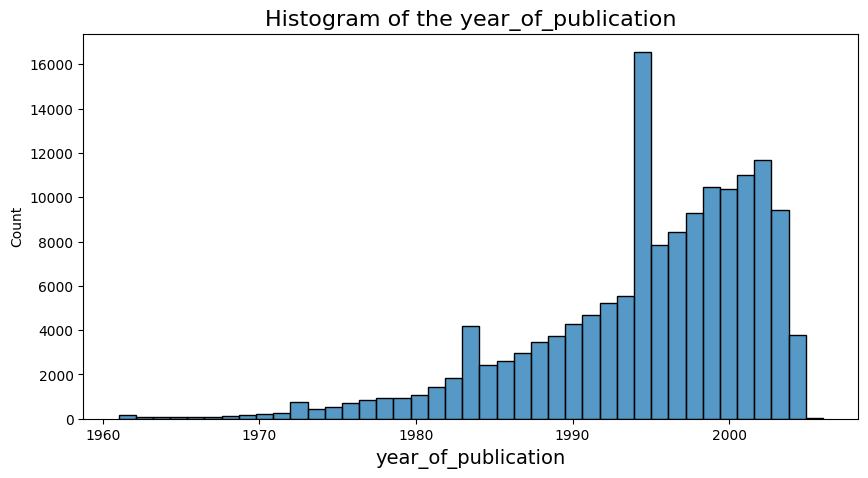

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(books[books['year_of_publication']>1960]['year_of_publication'],bins=41)
plt.xlabel('year_of_publication',size=14)
plt.title('Histogram of the year_of_publication',size=16)
plt.show()

In [55]:
ratings.head()

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9


In [56]:
ratings['user_id'].nunique()

59803

In [57]:
ratings.shape

(306795, 3)

In [58]:
ratings['rating'].value_counts(True)

rating
8     0.239877
7     0.172519
9     0.158650
10    0.139422
6     0.082501
5     0.045995
1     0.043185
2     0.042142
4     0.041419
3     0.034290
Name: proportion, dtype: float64

In [59]:
#유저당 몇 권 정도의 책을 읽었는지 살펴보겠습니다.
ratings.groupby('user_id')['rating'].count().sort_values(ascending=False)

user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
          ... 
47317        1
150670       1
150676       1
150677       1
138957       1
Name: rating, Length: 59803, dtype: int64

In [60]:
heavy_users_list = ratings.groupby('user_id')['rating'].count().sort_values(ascending=False).head(20).index

In [61]:

ratings[ratings['user_id'].isin(heavy_users_list)].groupby('user_id')['rating'].mean()

user_id
11676     6.779891
16795     6.423684
23902     7.174686
35859     7.175896
56399     9.312036
76499     8.477778
95359     7.200820
98391     8.566228
101851    8.420354
114368    4.364389
153662    8.209893
158295    5.770270
171118    6.961089
177458    6.757794
182085    8.210269
185233    3.263914
189835    3.184298
197659    8.116170
235105    7.713054
248718    7.419009
Name: rating, dtype: float64

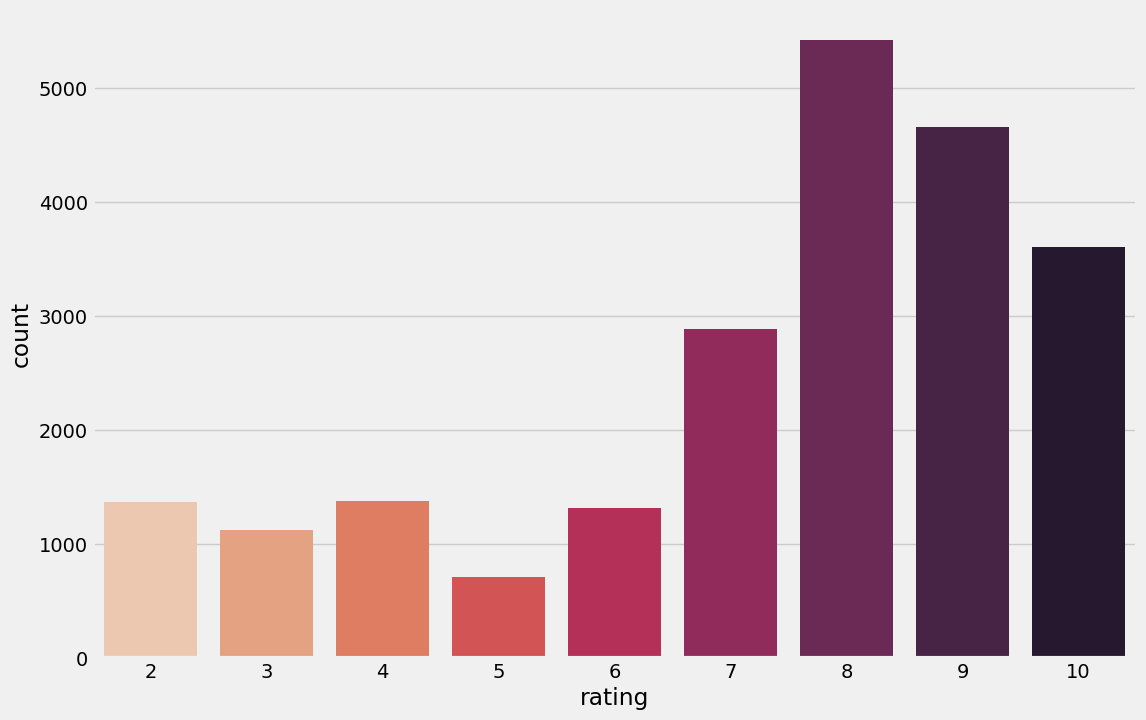

In [62]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings[(ratings['user_id'].isin(heavy_users_list))&(ratings['rating']>1)] , x='rating', palette='rocket_r')
plt.show()

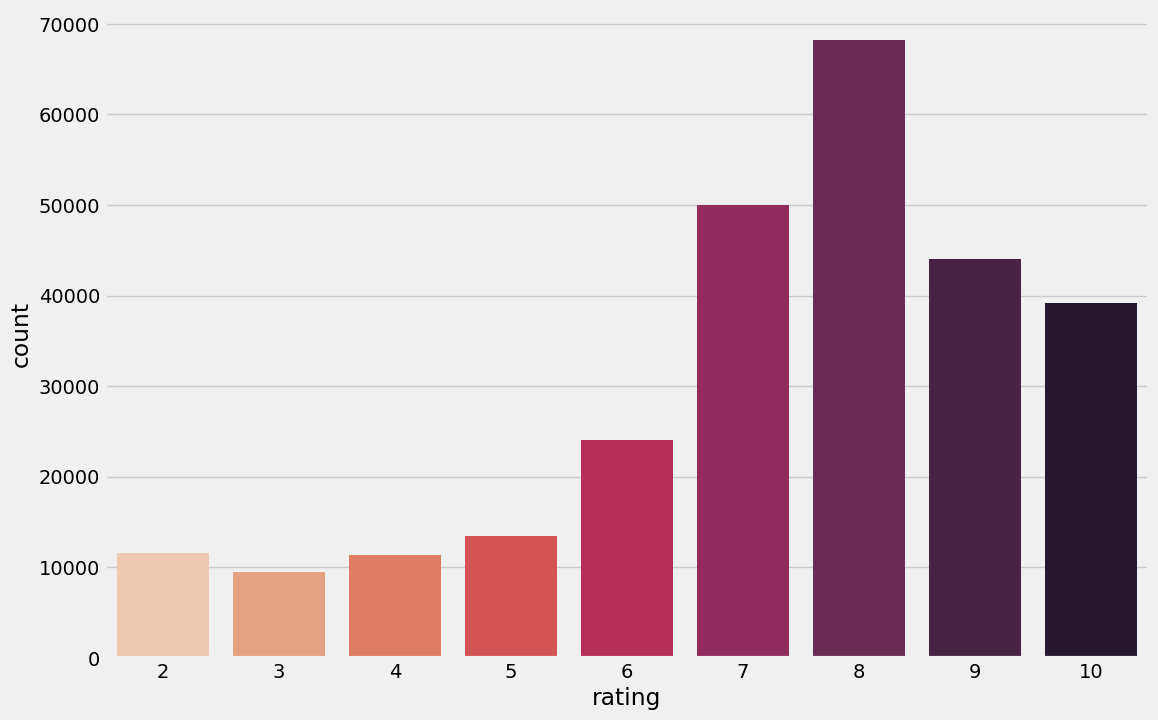

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings[~(ratings['user_id'].isin(heavy_users_list))&(ratings['rating']>1)] , x='rating', palette='rocket_r')
plt.show()

In [64]:
ratings.groupby('isbn')['rating'].count().sort_values(ascending=False)

isbn
0316666343    566
0971880107    465
0385504209    390
0312195516    307
0060928336    256
             ... 
0520060199      1
0520059808      1
0520058852      1
0520058763      1
B000234N3A      1
Name: rating, Length: 129777, dtype: int64

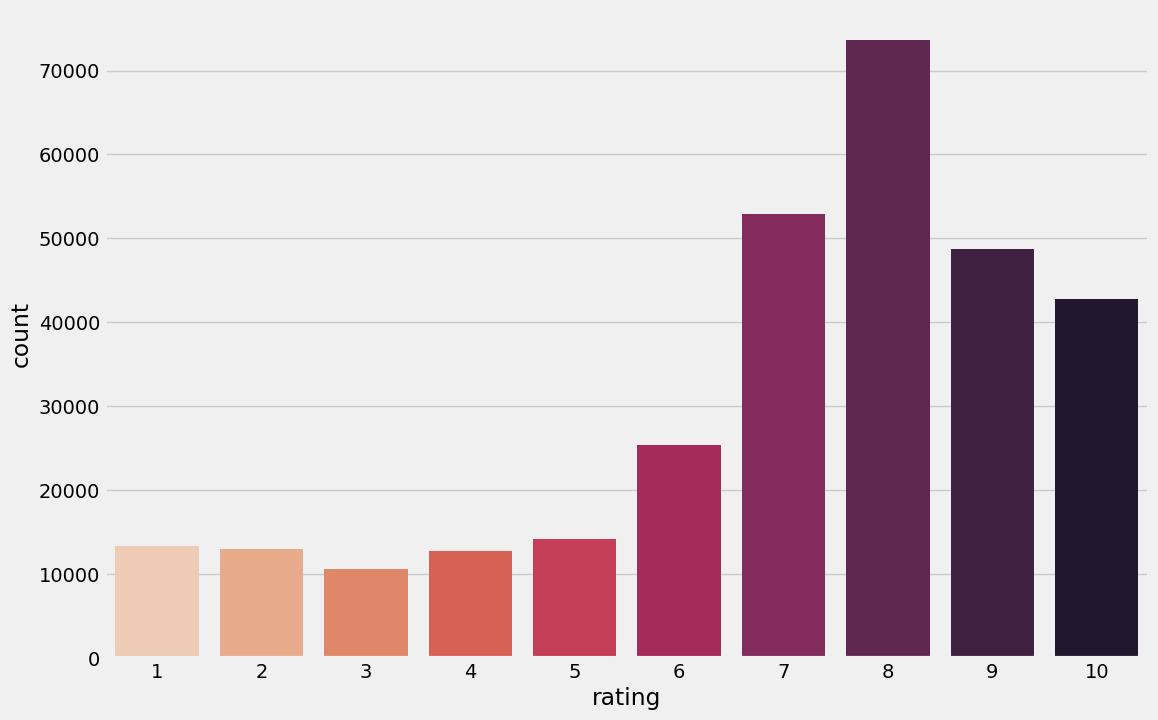

In [65]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings , x='rating', palette='rocket_r')
plt.show()


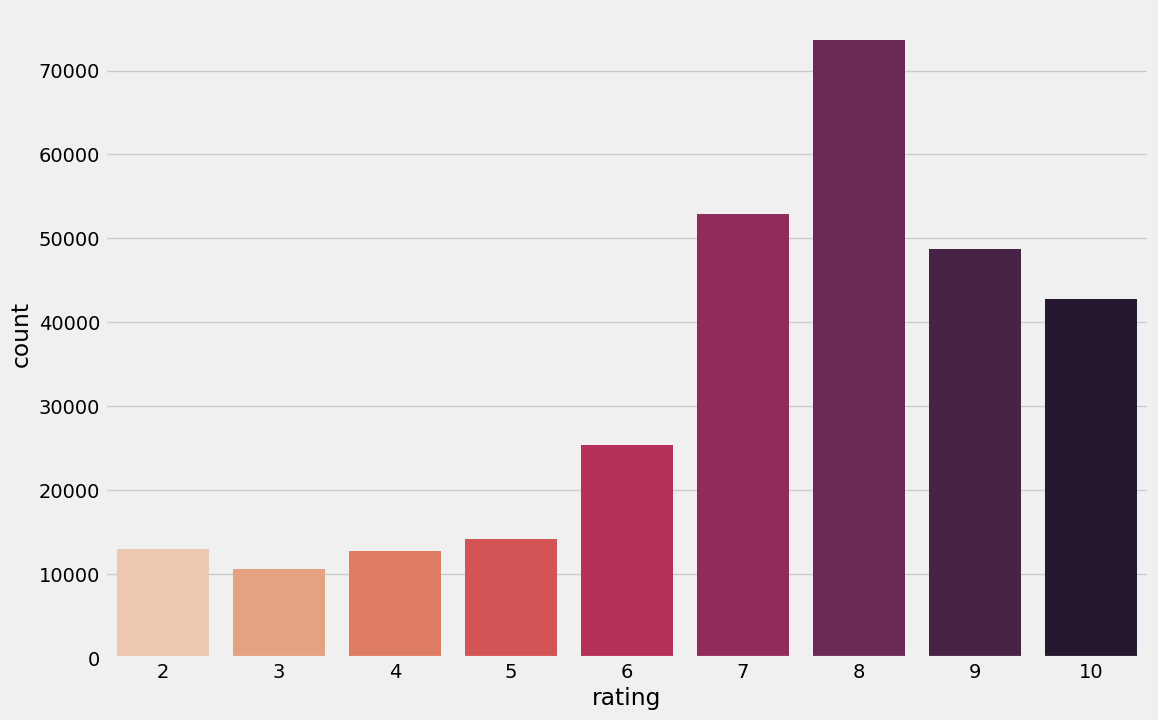

In [66]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings[(ratings['rating']>1)] , x='rating', palette='rocket_r')
plt.show()

In [5]:
merge1 = ratings.merge(books, how='left', on='isbn')
data = merge1.merge(users, how='inner', on='user_id')
print('merge 결과 shape: ', data.shape)

merge 결과 shape:  (306795, 14)


In [68]:
ratings.shape
# ratings 기록 갯수만큼 결과가 나온것을 확인 할 수 있습니다.

(306795, 3)

In [69]:
set(ratings['isbn']) - set(books['isbn']) 

set()

In [70]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,Collins,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,actresses
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,Perennial,http://images.amazon.com/images/P/0060973129.0...,en,1940 1949,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,others
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,medical,"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,medical
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,fiction,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,fiction
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,history,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,history


# author

In [71]:
# 작가별 작품 개수
books['book_author'].value_counts()

book_author
Stephen King            446
Agatha Christie         404
William Shakespeare     381
Barbara Cartland        283
Nora Roberts            241
                       ... 
Steven Gillis             1
Robin Stevenson           1
Allen Wyatt               1
Merilyn Simonds Mohr      1
Mapsco                    1
Name: count, Length: 62058, dtype: int64

In [72]:
# 소문자로 모두 변경
books['book_author'] = books['book_author'].str.lower()

In [73]:
# TODO
# 띄어쓰기가 이상하게 된 애들이 있고, 이름만 있는 애들도 있음
books.loc[books['book_author'].str.contains('shakespeare', na=False), 'book_author'].value_counts()

book_author
william shakespeare      383
nicholas shakespeare       2
shakespeare                2
edward o. shakespeare      1
william  shakespeare       1
norman shakespeare         1
william, shakespeare       1
tom shakespeare            1
Name: count, dtype: int64

In [74]:
books.loc[books['book_author'].str.contains('christie', na=False), 'book_author'].value_counts()

book_author
agatha christie             407
christie golden              14
christie                     12
christie ridgway              8
amanda christie               3
christie rose                 1
christie wells                1
murray christie               1
dav christie murray           1
david christie-murray         1
william christie              1
christie mellor               1
jack christie                 1
agatha christie mallowan      1
christie ridgeway             1
christie katona               1
christie dickason             1
Name: count, dtype: int64

In [75]:
print(data[data['book_author'] == 'Stephen King']['rating'].value_counts())
data[data['book_author'] == 'Stephen King']['rating'].mean()

rating
8     830
9     687
10    650
7     535
6     283
2     172
5     151
4     151
1     131
3     119
Name: count, dtype: int64


7.267996764626584

In [76]:
print(data[data['book_author'] == 'Agatha Christie']['rating'].value_counts())
data[data['book_author'] == 'Agatha Christie']['rating'].mean()

rating
8     200
7     123
9     116
10     81
6      62
5      27
4      26
3      19
2      17
1      14
Name: count, dtype: int64


7.344525547445255

In [77]:
print(data[data['book_title'].str.contains('Book 1', na=False)]['rating'].value_counts())
print(data[data['book_title'].str.contains('Book 1', na=False)]['rating'].mean())

rating
8     466
9     367
10    349
7     293
6     138
5      92
1      87
2      68
4      60
3      48
Name: count, dtype: int64
7.351117886178862


In [78]:
print(data[data['book_title'].str.contains('Book 2', na=False)]['rating'].value_counts())
print(data[data['book_title'].str.contains('Book 2', na=False)]['rating'].mean())

rating
8     306
9     279
10    273
7     190
6      81
5      36
2      34
1      30
3      27
4      25
Name: count, dtype: int64
7.7782982045277125


In [79]:
print(data[data['book_title'].str.contains('Book 3', na=False)]['rating'].value_counts())
print(data[data['book_title'].str.contains('Book 3', na=False)]['rating'].mean())

rating
10    240
9     216
8     189
7     113
6      46
2      28
1      25
5      23
4      21
3      21
Name: count, dtype: int64
7.8806941431670285


* 시리즈가 증가할수록 평점이 높아진다?

In [80]:
print(data[data['book_title'].str.contains('Book 4', na=False)]['rating'].value_counts())
print(data[data['book_title'].str.contains('Book 4', na=False)]['rating'].mean())

rating
10    158
9     115
8     103
7      90
6      27
2      21
5      12
4      12
3      11
1       8
Name: count, dtype: int64
7.938958707360862


In [81]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
0,0002005018,Clara Callan,richard bruce wright,2001.0,Collins,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,actresses
1,0060973129,Decision in Normandy,carlo d'este,1991.0,Perennial,http://images.amazon.com/images/P/0060973129.0...,en,1940 1949,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,others
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,gina bari kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,medical,"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,medical
3,0399135782,The Kitchen God's Wife,amy tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,fiction,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,fiction
4,0425176428,What If?: The World's Foremost Military Histor...,robert cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,history,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,history


In [82]:
books.shape

(149570, 11)

In [83]:
books.isna().sum()/len(books)

isbn                   0.000000
book_title             0.000000
book_author            0.000007
year_of_publication    0.000000
publisher              0.000000
img_url                0.000000
language               0.449468
category               0.460326
summary                0.449468
img_path               0.000000
category_high          0.460326
dtype: float64

In [84]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
0,0002005018,Clara Callan,richard bruce wright,2001.0,Collins,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,actresses
1,0060973129,Decision in Normandy,carlo d'este,1991.0,Perennial,http://images.amazon.com/images/P/0060973129.0...,en,1940 1949,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,others
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,gina bari kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,medical,"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,medical
3,0399135782,The Kitchen God's Wife,amy tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,fiction,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,fiction
4,0425176428,What If?: The World's Foremost Military Histor...,robert cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,history,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,history


In [85]:
users.shape

(68092, 5)

In [86]:
users.isna().sum()

user_id                 0
age                 27833
location_city         122
location_state       1132
location_country      271
dtype: int64

In [87]:
ratings.shape

(306795, 3)

In [88]:
ratings.isna().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [89]:
books['isbn']

0         0002005018
1         0060973129
2         0374157065
3         0399135782
4         0425176428
             ...    
149565    067161746X
149566    0767907566
149567    0884159221
149568    0912333022
149569    1569661057
Name: isbn, Length: 149570, dtype: object

In [90]:
books[books['isbn'].str.startswith('1')]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
9,1552041778,Jane Doe,r. j. kaiser,1999.0,Firefly Books Ltd,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,NaN
10,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,jack canfield,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.0...,NaN,NaN,NaN,images/1558746218.01.THUMBZZZ.jpg,NaN
11,1567407781,The Witchfinder (Amos Walker Mystery Series),loren d. estleman,1998.0,Llewellyn Publications,http://images.amazon.com/images/P/1567407781.0...,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,NaN
12,1575663937,More Cunning Than Man: A Social History of Rat...,robert hendrickson,1999.0,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575663937.0...,en,nature,"This eye-opening, well-researched examination ...",images/1575663937.01.THUMBZZZ.jpg,nature
13,1881320189,Goodbye to the Buttermilk Sky,julia oliver,1994.0,Houghton Mifflin Co,http://images.amazon.com/images/P/1881320189.0...,en,fiction,A beautifully narrated novel of time and place...,images/1881320189.01.THUMBZZZ.jpg,fiction
...,...,...,...,...,...,...,...,...,...,...,...
149550,185813501X,The Life and Works of Gustav Klimt,nathaniel harris,1994.0,Rough Guides Limited,http://images.amazon.com/images/P/185813501X.0...,NaN,NaN,NaN,images/185813501X.01.THUMBZZZ.jpg,NaN
149553,1550390961,"Gilean Douglas: Writing Nature, Finding Home",andrea pinto lebowitz,1999.0,ECW Press,http://images.amazon.com/images/P/1550390961.0...,en,authors canadian english 20th century biography,Her writings span almost the entire twentieth ...,images/1550390961.01.THUMBZZZ.jpg,others
149555,1562477544,A Song for Jeffrey (Ag Fiction (American Girl)),constance m. foland,1999.0,Pleasant Company Publications,http://images.amazon.com/images/P/1562477544.0...,NaN,NaN,NaN,images/1562477544.01.THUMBZZZ.jpg,NaN
149556,1896095186,Pool-Hopping,anne fleming,2000.0,Drawn & Quarterly,http://images.amazon.com/images/P/1896095186.0...,en,fiction,The fascinating characters in this short story...,images/1896095186.01.THUMBZZZ.jpg,fiction


In [91]:
data[data['isbn'].str.startswith('0')]['location_country'].value_counts()

location_country
usa                   197971
canada                 26738
unitedkingdom          11190
australia               4877
germany                 2366
                       ...  
districtofcolumbia         1
angola                     1
newhampshire               1
northyorkshire             1
alberta                    1
Name: count, Length: 215, dtype: int64

In [92]:
data[data['isbn'].str.startswith('1')]['location_country'].value_counts()

location_country
usa              15772
canada            2345
unitedkingdom     1691
australia          665
portugal           236
                 ...  
virginia             1
albania              1
alberta              1
pakistan             1
guatemala            1
Name: count, Length: 105, dtype: int64

In [93]:
# isbn 시작 숫자 개수
print(data['isbn'].apply(lambda x: x[0]).value_counts())

# isbn 개수
print(len(data['isbn'].apply(lambda x: x[0]).value_counts()))

print(list(data[data['isbn'].str.startswith('0')]['location_country'].value_counts().to_dict().items())[:3])

isbn
0    263999
1     22894
3      9293
8      5197
2      4343
9       917
4        72
B        51
5        24
7         5
Name: count, dtype: int64
10
[('usa', 197971), ('canada', 26738), ('unitedkingdom', 11190)]


# isbn별 나라 탑3 추출하기 성공!

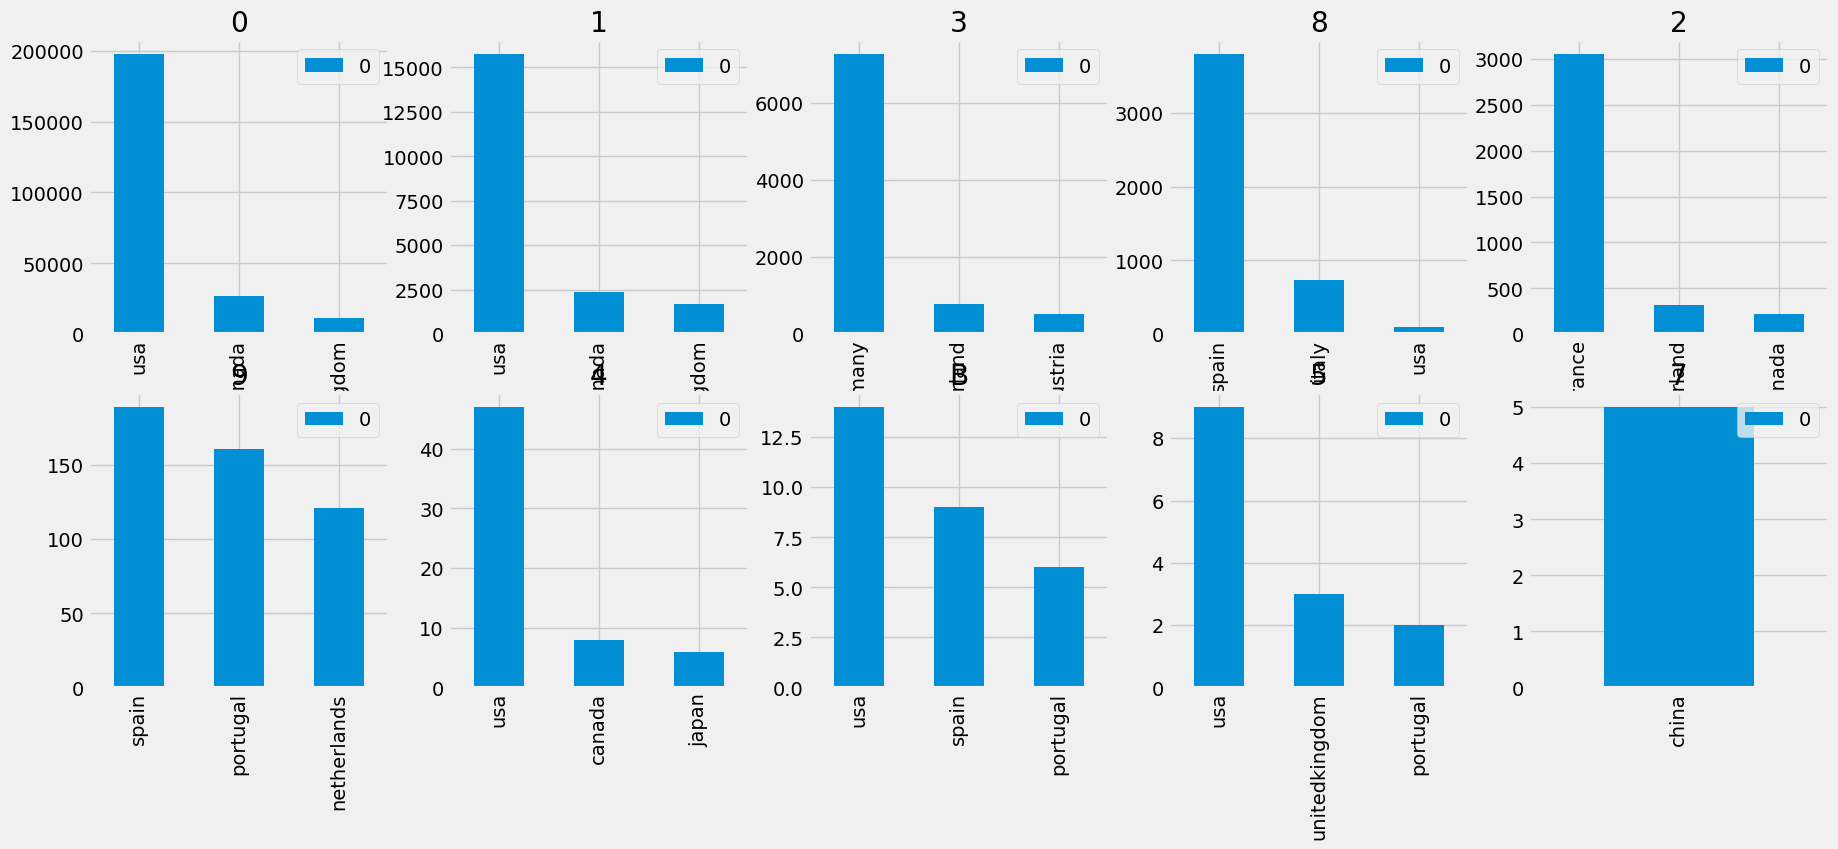

In [94]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
isbn_startwith = data['isbn'].apply(lambda x: x[0]).value_counts().index[:]
df = []
for isbn_country, ax_ in zip(isbn_startwith, ax.flatten()):
    df = list(data[data['isbn'].str.startswith(isbn_country)]['location_country'].value_counts().to_dict().items())[:3]
    df = pd.DataFrame(list(top_isbn[1] for top_isbn in df), index=list(top_isbn[0] for top_isbn in df))
    df.plot(kind='bar', ax=ax_, title=isbn_country)

plt.show()

In [95]:
# 망한거
data[data['isbn'].str.startswith('2')]['location_country'].value_counts().index[:3]
isbn_startwith = data['isbn'].apply(lambda x: x[0]).value_counts().index[:]
first_country = []
second_country = []
third_country = []
for isbn_country in isbn_startwith:
    first_country.append(data[data['isbn'].str.startswith(isbn_country)]['location_country'].value_counts().index[0])
    if len(data[data['isbn'].str.startswith(isbn_country)]['location_country'].value_counts()) >= 2:
        second_country.append(data[data['isbn'].str.startswith(isbn_country)]['location_country'].value_counts().index[1])
    else:
        second_country.append('None')
    if len(data[data['isbn'].str.startswith(isbn_country)]['location_country'].value_counts()) >= 3:
        third_country.append(data[data['isbn'].str.startswith(isbn_country)]['location_country'].value_counts().index[2])
    else:
        third_country.append('None')
print(first_country)
print(second_country)
print(third_country)

['usa', 'usa', 'germany', 'spain', 'france', 'spain', 'usa', 'usa', 'usa', 'china']
['canada', 'canada', 'switzerland', 'italy', 'switzerland', 'portugal', 'canada', 'spain', 'unitedkingdom', 'None']
['unitedkingdom', 'unitedkingdom', 'austria', 'usa', 'canada', 'netherlands', 'japan', 'portugal', 'portugal', 'None']


## 망한거

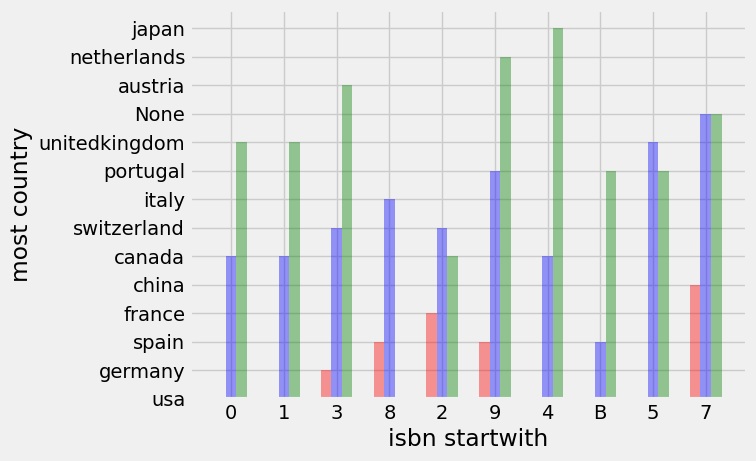

In [96]:
import numpy as np
df = pd.DataFrame({'First' : first_country, 'Second' : second_country, 'Third' : third_country}, index = isbn_startwith)

fig = plt.figure()
bar_width = 0.2
# isbn이 10개니까
index = np.arange(10)

b1 = plt.bar(index, df['First'], bar_width, alpha=0.4, color='red', label='First_country')

b2 = plt.bar(index + bar_width, df['Second'], bar_width, alpha=0.4, color='blue', label='Second_country')

b3 = plt.bar(index + 2 * bar_width, df['Third'], bar_width, alpha=0.4, color='green', label='Third_country')

plt.xticks(np.arange(bar_width, 10 + bar_width, 1), isbn_startwith)

plt.xlabel("isbn startwith")
plt.ylabel("most country")
plt.show()

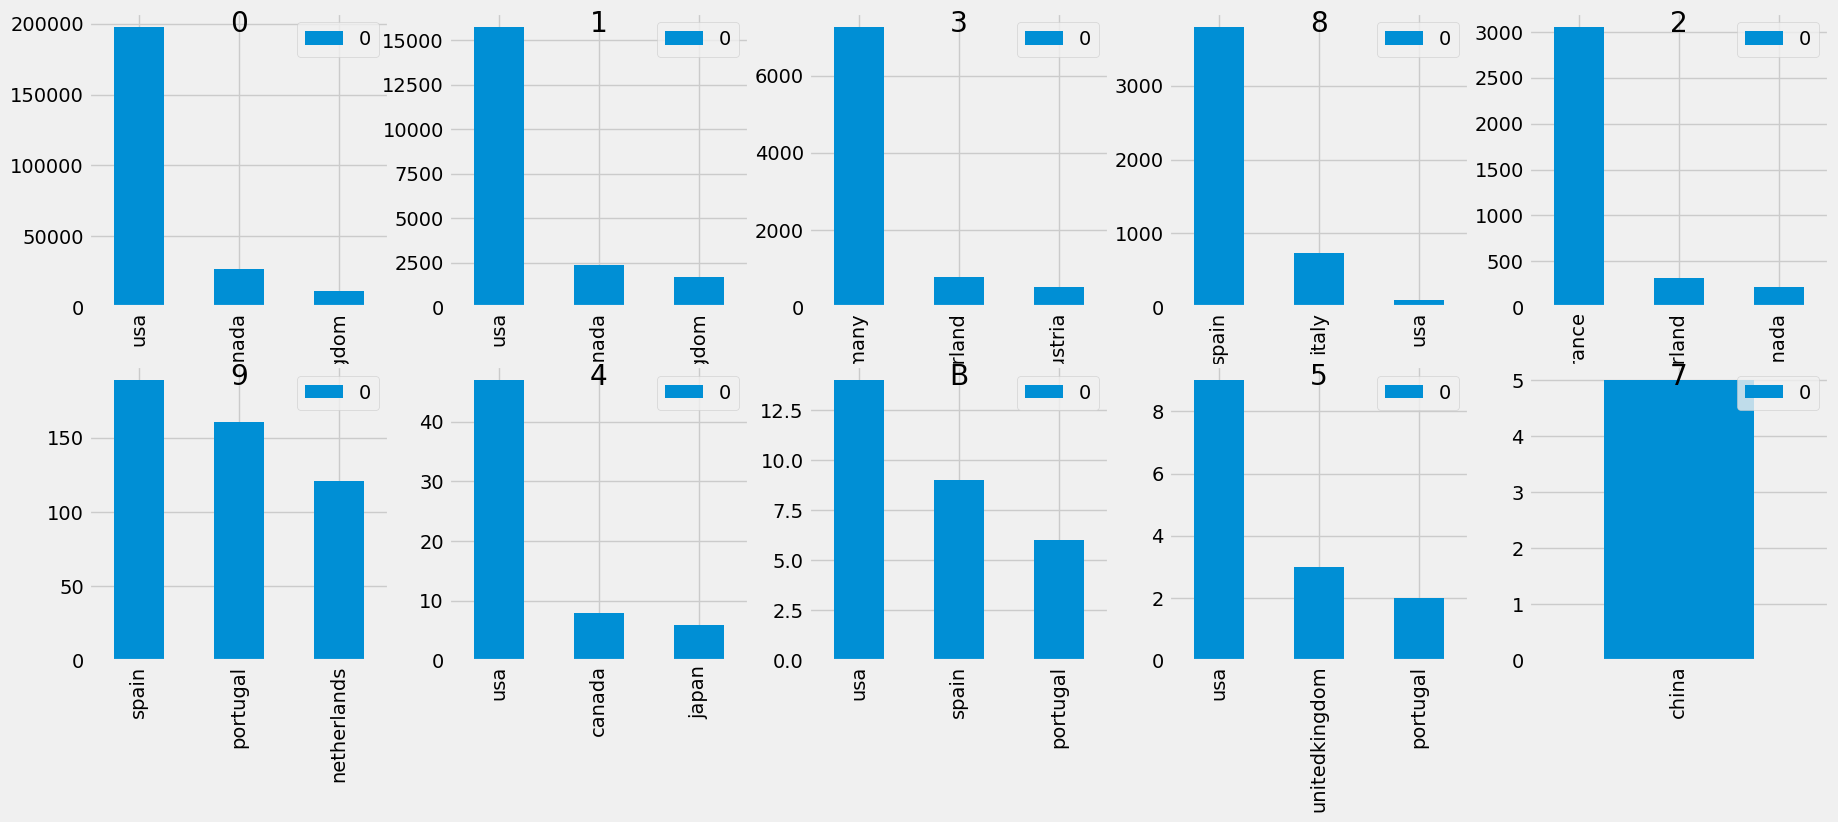

In [97]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
isbn_startwith = data['isbn'].apply(lambda x: x[0]).value_counts().index[:]
df = []
for isbn_country, ax_ in zip(isbn_startwith, ax.flatten()):
    df = list(data[data['isbn'].str.startswith(isbn_country)]['location_country'].value_counts().to_dict().items())[:3]
    df = pd.DataFrame(list(top_isbn[1] for top_isbn in df), index=list(top_isbn[0] for top_isbn in df))
    ax_.set_title(isbn_country, y=1.0, pad=-14)
    df.plot(kind='bar', ax=ax_)

plt.show()

In [98]:
books.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
category_high          68851
dtype: int64

In [99]:
books[books['language'].isna()]['isbn'].str.startswith('4')

5         False
8         False
9         False
10        False
11        False
          ...  
149560    False
149561    False
149564    False
149567    False
149569    False
Name: isbn, Length: 67227, dtype: bool

In [100]:
list(books[books['isbn'].str.startswith('9')]['language'].value_counts().to_dict().items())

books[books['isbn'].str.startswith('B')].head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
2886,B0000DAPP1,Discover Your Genius: How to Think Like Histor...,michael j. gelb,2002.0,Putnam Pub Group,http://images.amazon.com/images/P/B0000DAPP1.0...,NaN,NaN,NaN,images/B0000DAPP1.01.THUMBZZZ.jpg,NaN
15104,B0000A2U93,Carmilla,joseph sheridan le fanu,1994.0,Putnam Pub Group,http://images.amazon.com/images/P/B0000A2U93.0...,NaN,NaN,NaN,images/B0000A2U93.01.THUMBZZZ.jpg,NaN
16173,B0000633PU,The Story of Aladdin and the Wonderful Lamp,s. lane poole,1994.0,Putnam Pub Group,http://images.amazon.com/images/P/B0000633PU.0...,NaN,NaN,NaN,images/B0000633PU.01.THUMBZZZ.jpg,NaN
24710,B0000DYXID,A Kid's Guide To How to Save the Planet,billy goodman,1994.0,Putnam Pub Group,http://images.amazon.com/images/P/B0000DYXID.0...,NaN,NaN,NaN,images/B0000DYXID.01.THUMBZZZ.jpg,NaN
29467,B00006CRTE,"Devil Knows You're Dead, The: A Matthew Scudde...",lawrence block,1994.0,Putnam Pub Group,http://images.amazon.com/images/P/B00006CRTE.0...,NaN,NaN,NaN,images/B00006CRTE.01.THUMBZZZ.jpg,NaN


In [101]:
books['language'].isna().sum()

67227

In [6]:
isbn_startwith = data['isbn'].apply(lambda x: x[0]).value_counts().index[:]

most_language_for_isbn = {}
for isbn_s in isbn_startwith:
    if len(list(books[books['isbn'].str.startswith(isbn_s)]['language'].value_counts().to_dict().items())) != 0:
        most_language_for_isbn[isbn_s] = list(books[books['isbn'].str.startswith(isbn_s)]['language'].value_counts().to_dict().items())[0][0]
    else:
        # 하나도 없는거는 isbn이 B로 시작하는 경우인데 그 경우 책이 영어로 되어있다.
        most_language_for_isbn[isbn_s] = 'en'
print(most_language_for_isbn)

{'0': 'en', '1': 'en', '3': 'de', '8': 'es', '2': 'fr', '9': 'es', '4': 'en', 'B': 'en', '5': 'en', '7': 'zh-CN'}


In [7]:
isbn_startwith = data['isbn'].apply(lambda x: x[0]).value_counts().index[:]

for isbn_s in isbn_startwith:
    books.loc[(books['isbn'].str.startswith(isbn_s) & books['language'].isna()), 'language'] = most_language_for_isbn[isbn_s]

In [104]:
books['language'].isna().sum()

0

In [105]:
books.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language                   0
category               68851
summary                67227
img_path                   0
category_high          68851
dtype: int64

In [106]:
users.isna().sum()

user_id                 0
age                 27833
location_city         122
location_state       1132
location_country      271
dtype: int64

In [107]:
data.isna().sum()

user_id                     0
isbn                        0
rating                      0
book_title                  0
book_author                 1
year_of_publication         0
publisher                   0
img_url                     0
language               119084
category               121221
summary                119084
img_path                    0
category_high          121221
age                     92662
location_city            7008
location_state           8718
location_country         6577
dtype: int64

In [108]:
books[books['category'].isna()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
5,0671870432,PLEADING GUILTY,scott turow,1993.0,Pocket,http://images.amazon.com/images/P/0671870432.0...,en,NaN,NaN,images/0671870432.01.THUMBZZZ.jpg,NaN
8,0887841740,The Middle Stories,sheila heti,2004.0,HarperBusiness,http://images.amazon.com/images/P/0887841740.0...,en,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg,NaN
9,1552041778,Jane Doe,r. j. kaiser,1999.0,Firefly Books Ltd,http://images.amazon.com/images/P/1552041778.0...,en,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,NaN
10,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,jack canfield,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.0...,en,NaN,NaN,images/1558746218.01.THUMBZZZ.jpg,NaN
11,1567407781,The Witchfinder (Amos Walker Mystery Series),loren d. estleman,1998.0,Llewellyn Publications,http://images.amazon.com/images/P/1567407781.0...,en,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149560,0345330293,Town Like Alice,nevil shute,1981.0,Ballantine Books,http://images.amazon.com/images/P/0345330293.0...,en,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg,NaN
149561,8408044079,LA Muerte Del Decano,gonzalo torrrente ballester,2002.0,Planeta,http://images.amazon.com/images/P/8408044079.0...,es,NaN,NaN,images/8408044079.01.THUMBZZZ.jpg,NaN
149564,0743525493,The Motley Fool's What To Do with Your Money N...,david gardner,2002.0,Pocket,http://images.amazon.com/images/P/0743525493.0...,en,NaN,NaN,images/0743525493.01.THUMBZZZ.jpg,NaN
149567,0884159221,Why stop?: A guide to Texas historical roadsid...,claude dooley,1985.0,Bridge Publications,http://images.amazon.com/images/P/0884159221.0...,en,NaN,NaN,images/0884159221.01.THUMBZZZ.jpg,NaN


In [109]:
books['category_high'].value_counts()

category_high
fiction                       39678
others                         4134
biography autobiography        3335
history                        1949
religion                       1824
                              ...  
female friendship                 5
applications for positions        5
relaxation                        5
mexico                            5
ducks                             5
Name: count, Length: 412, dtype: int64

In [110]:
books[books['book_title'].str.contains("Pleading Guilty")]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
5041,0446365505,Pleading Guilty,scott turow,1994.0,Warner Books,http://images.amazon.com/images/P/0446365505.0...,en,NaN,NaN,images/0446365505.01.THUMBZZZ.jpg,NaN
22680,0816157464,Pleading Guilty (G K Hall Large Print Book Ser...,scott turow,1993.0,Troll Communications,http://images.amazon.com/images/P/0816157464.0...,en,NaN,NaN,images/0816157464.01.THUMBZZZ.jpg,NaN
37056,0374234574,Pleading Guilty,scott turow,1993.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374234574.0...,en,fiction,Immediately. Turow&#39;s third novel takes us ...,images/0374234574.01.THUMBZZZ.jpg,fiction


In [111]:
list(users[users['age'].notna()]['age'])

[49.0,
 30.0,
 36.0,
 29.0,
 29.0,
 60.0,
 27.0,
 71.0,
 40.0,
 53.0,
 65.0,
 36.0,
 46.0,
 30.0,
 47.0,
 49.0,
 26.0,
 56.0,
 37.0,
 39.0,
 25.0,
 27.0,
 31.0,
 41.0,
 20.0,
 58.0,
 42.0,
 38.0,
 52.0,
 21.0,
 42.0,
 42.0,
 22.0,
 34.0,
 33.0,
 19.0,
 33.0,
 57.0,
 51.0,
 29.0,
 26.0,
 37.0,
 31.0,
 29.0,
 38.0,
 35.0,
 25.0,
 31.0,
 49.0,
 53.0,
 22.0,
 51.0,
 39.0,
 32.0,
 29.0,
 47.0,
 62.0,
 29.0,
 31.0,
 56.0,
 45.0,
 37.0,
 42.0,
 40.0,
 74.0,
 34.0,
 51.0,
 44.0,
 36.0,
 39.0,
 43.0,
 68.0,
 47.0,
 35.0,
 37.0,
 54.0,
 55.0,
 24.0,
 40.0,
 18.0,
 57.0,
 57.0,
 40.0,
 45.0,
 59.0,
 33.0,
 44.0,
 43.0,
 38.0,
 28.0,
 41.0,
 41.0,
 47.0,
 53.0,
 39.0,
 56.0,
 43.0,
 52.0,
 33.0,
 28.0,
 70.0,
 55.0,
 18.0,
 21.0,
 21.0,
 17.0,
 58.0,
 25.0,
 28.0,
 29.0,
 37.0,
 24.0,
 33.0,
 18.0,
 20.0,
 40.0,
 37.0,
 49.0,
 31.0,
 59.0,
 25.0,
 27.0,
 21.0,
 30.0,
 52.0,
 62.0,
 46.0,
 48.0,
 33.0,
 29.0,
 49.0,
 44.0,
 14.0,
 54.0,
 32.0,
 33.0,
 27.0,
 26.0,
 38.0,
 50.0,
 17.0,
 29.0,
 43.0,

In [112]:
no_age_users_len = len(users[users['age'].isna()]['age'])

In [ ]:
users['age'].isna().sum()

0

In [ ]:
data['user_id'].value_counts()

user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
          ... 
54908        1
236844       1
44531        1
93836        1
278713       1
Name: count, Length: 59803, dtype: int64

In [ ]:
data[data['user_id'] == 11676]['category'].value_counts()

category
fiction                            1844
juvenile fiction                    236
biography autobiography             123
humor                                75
juvenile nonfiction                  48
                                   ... 
banks alan fictitious character       1
imaginary histories                   1
brothers                              1
missionaries                          1
singapore                             1
Name: count, Length: 374, dtype: int64

In [ ]:
data[data['category'].isna()]['isbn'].value_counts()

isbn
0316666343    566
0446672211    236
0316601950    218
0671027360    216
0375727345    183
             ... 
0770502563      1
0807220280      1
0613369394      1
0002005557      1
0345330293      1
Name: count, Length: 59000, dtype: int64

In [ ]:
books[books['isbn'] == '0316666343']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
203,0316666343,The Lovely Bones: A Novel,alice sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,en,NaN,NaN,images/0316666343.01.THUMBZZZ.jpg,NaN


In [ ]:
data[data['isbn'] == '0316666343']['user_id']

905        11676
6474       46398
7470       11224
8678      105979
9229      118659
           ...  
110947    276014
110948    276545
110950    276680
111021    277752
111023    278633
Name: user_id, Length: 566, dtype: int64

In [ ]:
data.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high,age,location_city,location_state,location_country
0,8,0002005018,4,Clara Callan,Richard Bruce Wright,2001.0,Collins,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,actresses,NaN,timmins,ontario,canada
1,8,074322678X,4,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Pocket,http://images.amazon.com/images/P/074322678X.0...,en,fiction,"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg,fiction,NaN,timmins,ontario,canada
2,8,0887841740,2,The Middle Stories,Sheila Heti,2004.0,HarperBusiness,http://images.amazon.com/images/P/0887841740.0...,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg,NaN,NaN,timmins,ontario,canada
3,8,1552041778,2,Jane Doe,R. J. Kaiser,1999.0,Firefly Books Ltd,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,NaN,NaN,timmins,ontario,canada
4,8,1567407781,6,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Llewellyn Publications,http://images.amazon.com/images/P/1567407781.0...,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,NaN,NaN,timmins,ontario,canada


In [ ]:
users.isna().sum()

user_id                 0
age                 27833
location_city         122
location_state       1132
location_country      271
dtype: int64

In [ ]:
books.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language                   0
category               68851
summary                67227
img_path                   0
category_high          68851
dtype: int64

In [ ]:
list(data[data['category_high'].isna()]['isbn'].value_counts().to_dict().items())

# 한 권당 2명 이상 읽은 책의 개수는 15746권
(data[data['category_high'].isna()]['isbn'].value_counts() >= 2).value_counts()

count
False    43254
True     15746
Name: count, dtype: int64

# 한명당 몇권정도 읽는지 확인

In [ ]:
# 5권 이상 읽은 사람이 10000명
(data['user_id'].value_counts() >= 2).value_counts()

count
False    34617
True     25186
Name: count, dtype: int64

## 한 권만 읽은 사람은 카테고리가 없는 책만 읽은것이기 때문에 쓸수가 없음

# 출판사별 카테고리 비중 확인

In [ ]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
0,0002005018,Clara Callan,richard bruce wright,2001.0,Collins,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,actresses
1,0060973129,Decision in Normandy,carlo d'este,1991.0,Perennial,http://images.amazon.com/images/P/0060973129.0...,en,1940 1949,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,others
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,gina bari kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,medical,"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,medical
3,0399135782,The Kitchen God's Wife,amy tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,fiction,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,fiction
4,0425176428,What If?: The World's Foremost Military Histor...,robert cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,history,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,history


In [ ]:
(books['publisher'].value_counts() >= 2).value_counts()

count
True     939
False    584
Name: count, dtype: int64

In [ ]:
print(books.isna().sum())
print(users.isna().sum())

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language                   0
category               68851
summary                67227
img_path                   0
category_high          68851
dtype: int64
user_id                 0
age                 27833
location_city         122
location_state       1132
location_country      271
dtype: int64


In [ ]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
0,0002005018,Clara Callan,richard bruce wright,2001.0,Collins,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,actresses
1,0060973129,Decision in Normandy,carlo d'este,1991.0,Perennial,http://images.amazon.com/images/P/0060973129.0...,en,1940 1949,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,others
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,gina bari kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,medical,"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,medical
3,0399135782,The Kitchen God's Wife,amy tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,fiction,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,fiction
4,0425176428,What If?: The World's Foremost Military Histor...,robert cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,history,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,history


In [ ]:
books[books['publisher'] == 'Collins'].head(3)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
0,0002005018,Clara Callan,richard bruce wright,2001.0,Collins,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,actresses
146,0002740230,Keep It Simple: And Get More Out of Life,nick page,1999.0,Collins,http://images.amazon.com/images/P/0002740230.0...,en,self help,"Here is a guide to make life simpler, easier a...",images/0002740230.01.THUMBZZZ.jpg,self help
7217,0002258579,Resurrection Club,christopher wallace,1999.0,Collins,http://images.amazon.com/images/P/0002258579.0...,en,body snatching,Mediocre PR consultant Charles Kidd might just...,images/0002258579.01.THUMBZZZ.jpg,others


In [ ]:
books[books['publisher'] == 'Perennial'].head(3)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
1,0060973129,Decision in Normandy,carlo d'este,1991.0,Perennial,http://images.amazon.com/images/P/0060973129.0...,en,1940 1949,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,others
38,0060168013,Pigs in Heaven,barbara kingsolver,1993.0,Perennial,http://images.amazon.com/images/P/0060168013.0...,en,fiction,"As this spellbinding novel unfolds, it draws t...",images/0060168013.01.THUMBZZZ.jpg,fiction
50,0060914068,"Love, Medicine and Miracles",m.d. bernie s. siegel,1988.0,Perennial,http://images.amazon.com/images/P/0060914068.0...,en,control psychology,"Explores the link between mind and body, and s...",images/0060914068.01.THUMBZZZ.jpg,psycholog


In [ ]:
books[books['publisher'] == 'Berkley Publishing Group'].head(3)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
4,0425176428,What If?: The World's Foremost Military Histor...,robert cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,history,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,history
26,0425099148,Death in the Clouds,agatha christie,1997.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425099148.0...,en,fiction,"When Madame Giselle, the well-known Parisian m...",images/0425099148.01.THUMBZZZ.jpg,fiction
33,0425163091,Chocolate Jesus,stephan jaramillo,1998.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,en,fiction,When Sydney Corbett comes up with the idea of ...,images/0425163091.01.THUMBZZZ.jpg,fiction


In [ ]:
books[books['book_author'].str.contains('shakespeare', na=False) & books['book_author'].str.contains('william', na=False)]['book_author'].value_counts()

book_author
william shakespeare     383
william  shakespeare      1
william, shakespeare      1
Name: count, dtype: int64

In [ ]:
books['book_author'].value_counts()

book_author
stephen king                   453
agatha christie                407
william shakespeare            383
barbara cartland               284
nora roberts                   245
                              ... 
jean a. thompson pennington      1
carol s. pearson                 1
leslie whitaker                  1
margot zemach                    1
mapsco                           1
Name: count, Length: 60289, dtype: int64

In [ ]:
books[books['category'].isna()]['book_author'].value_counts()

book_author
stephen king           280
agatha christie        244
william shakespeare    203
barbara cartland       203
terry pratchett        147
                      ... 
starkey                  1
edward wagenknecht       1
lo linkert               1
heron house              1
mapsco                   1
Name: count, Length: 35066, dtype: int64

In [ ]:
# author_category_high = dict()
# for book_author in books[books['category_high'].notna()]['book_author'].unique():
#     author_category_high[book_author] = books[books['book_author'] == book_author]['category_high'].value_counts().idxmax()

In [ ]:
books[books['book_author'] == 'stephen king']['category_high'].value_counts().idxmax()

'fiction'

In [ ]:
books[books['category_high'].notna()]['book_author'].unique()

array(['richard bruce wright', "carlo d'este", 'gina bari kolata', ...,
       'john cech', 'sam lightner', 'jeremy lloyd'], dtype=object)

In [ ]:
books.loc[books['book_author'] == 'richard bruce wright', 'category_high']

0    actresses
Name: category_high, dtype: object

In [ ]:
books_tmp = books.copy()

In [ ]:
books_tmp.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language                   0
category               68851
summary                67227
img_path                   0
category_high          68851
dtype: int64

In [ ]:
data['isbn'].unique()

array(['0002005018', '074322678X', '0887841740', ..., '0375507299',
       '0345330293', '0670528951'], dtype=object)

In [ ]:
from collections import defaultdict
user_book = defaultdict(list)
for isbn in data['isbn'].unique():
    user_book[isbn].append(data[data['isbn'] == isbn])

In [ ]:
data['isbn'].value_counts()

isbn
0316666343    566
0971880107    465
0385504209    390
0312195516    307
0060928336    256
             ... 
0679312544      1
067903515X      1
0676973787      1
0618031685      1
0670528951      1
Name: count, Length: 129777, dtype: int64

In [116]:
books['category'].unique()

array(['actresses', '1940 1949', 'medical', ..., 'deafness',
       'alternative histories',
       'authors canadian english 20th century biography'], dtype=object)

# 카테고리 원핫 인코딩 한 후 regression으로 결측치 찾아보기?

In [138]:
import json

with open('./dict.json', 'r') as f:
    dict_ = json.load(f)

In [139]:
books["category_high_v2"] = books['category_high'].copy()

for key in dict_.keys():
    set_ = set(dict_[key])
    books.loc[books[books['category_high'].isin(set_)].index , 'category_high_v2'] = key

books['category_high_v2'].value_counts()

category_high_v2
fiction1                             39678
other                                 5323
art_literature                        4517
society_human relations               3726
biograph_autobiograph                 3335
religion_philosophy                   3335
history_culture                       3074
human psychology_self-development     2929
science_nature                        2600
fiction2                              2531
home_life                             2079
game_leisure                          1562
nonfiction                            1427
health                                1255
economy_business                      1189
cook_food                             1149
computer_internat                      899
animals                                111
Name: count, dtype: int64

In [140]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
train_cat = ohe.fit_transform(books[['category_high_v2']])
train_cat

/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [141]:
ohe.categories_

[array(['animals', 'art_literature', 'biograph_autobiograph',
        'computer_internat', 'cook_food', 'economy_business', 'fiction1',
        'fiction2', 'game_leisure', 'health', 'history_culture',
        'home_life', 'human psychology_self-development', 'nonfiction',
        'other', 'religion_philosophy', 'science_nature',
        'society_human relations', nan], dtype=object)]

In [177]:
ohe_cat = pd.DataFrame(train_cat, columns=[col for col in ohe.categories_[0]])

In [157]:
modified_books = books.drop(['category', 'summary', 'category_high', 'img_url', 'img_path'], axis=1)

In [164]:
modified_books = modified_books.dropna(subset='book_author')

In [183]:
int_isbn_publisher = modified_books['isbn'].apply(lambda x: x[1:4])

In [184]:
isbn_category = pd.concat([ohe_cat, int_isbn_publisher], axis=1)

In [192]:
isbn_category.columns = isbn_category.columns.astype(str)

In [2]:
isbn_category.shape

NameError: name 'isbn_category' is not defined

In [193]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state=42)
imputer.fit_transform(isbn_category)

array([[  0.,   1.,   0., ...,   0.,   0.,   2.],
       [  0.,   0.,   0., ...,   0.,   0.,  60.],
       [  0.,   0.,   0., ...,   0.,   0., 374.],
       ...,
       [  0.,   0.,   0., ...,   0.,   1., 884.],
       [  0.,   0.,   0., ...,   0.,   0., 912.],
       [  0.,   0.,   0., ...,   0.,   1., 569.]])

In [204]:
users['age'].apply(lambda x: int(x) if x == np.nan else np.nan)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
68087   NaN
68088   NaN
68089   NaN
68090   NaN
68091   NaN
Name: age, Length: 68092, dtype: float64

In [207]:

# IterativeImputer(max_iter = 10, random_state=42,).fit_transform([users['age'][:10000]])

: 

: 

In [9]:
books.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language                   0
category               68851
summary                67227
img_path                   0
dtype: int64

In [10]:
books.to_csv('books_language.csv', index=False)